# 25.01.24   
### 프로야구 타자 실습: 군집화 모델

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

# 데이터 준비

In [2]:
hitter1 = pd.read_csv('data/2000_2001_hitter.csv')
hitter2 = pd.read_csv('data/2002_2013_hitter.csv')
hitter3 = pd.read_csv('data/2014_hitter.csv')

# hitter1 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2000_2001_hitter.csv')
# hitter2 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2002_2013_hitter.csv')
# hitter3 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2014_hitter.csv')

print(f'hitter1 >>> {hitter1.shape}')
print(f'hitter2 >>> {hitter2.shape}')
print(f'hitter3 >>> {hitter3.shape}')

display(hitter1.head(3))
display(hitter2.head(3))
display(hitter3.head(3))

hitter1 >>> (89, 36)
hitter2 >>> (505, 39)
hitter3 >>> (55, 39)


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2002장성호,2002,1,장성호,KIA,0.343,133,586,481,82,...,48,0.365,0.0,0.178794,0.365904,1.047904,116.003072,9.104892,0.412689,106.706
1,2002마해영,2002,2,마해영,삼성,0.323,133,596,532,92,...,53,0.313,0.0,0.268797,0.359023,1.002674,120.662819,8.573411,0.413068,110.578
2,2002이승엽,2002,3,이승엽,삼성,0.323,133,617,511,123,...,47,0.331,0.0,0.365949,0.538160,1.267409,157.375689,11.770481,0.468948,136.108


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2014서건창,2014,1,서건창,넥센,0.370,128,616,543,135,...,66,0.390,0.0,0.176796,0.342541,1.097222,139.001623,10.254218,0.424498,120.634
1,2014김태균,2014,2,김태균,한화,0.365,118,508,422,66,...,44,0.354,0.0,0.199052,0.360190,1.100694,110.631890,10.194748,0.441970,97.816
2,2014손아섭,2014,3,손아섭,롯데,0.362,122,570,483,105,...,54,0.336,0.0,0.175983,0.356108,1.106918,125.666667,10.603125,0.428663,110.456


In [3]:
# 데이터프레임 병합 
hitter_concat = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
hitter_concat.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [4]:
# 변수 선택
X = hitter_concat[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = hitter_concat['YrPlayer']

print(X.shape, y.shape)
display(X.head())
display(y.head())


(649, 8) (649,)


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

<Axes: >

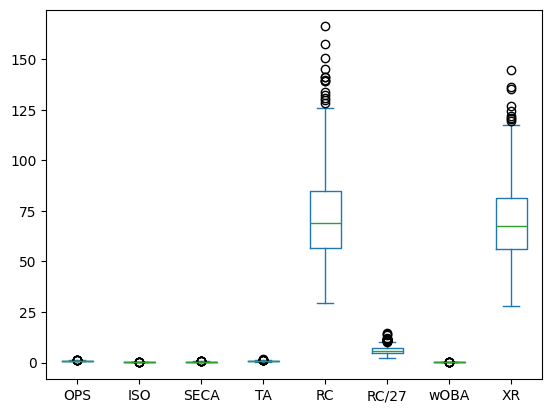

In [5]:
# 데이터 분포 확인
X.plot(kind='box')

In [6]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,:] = scaler.fit_transform(X)
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133


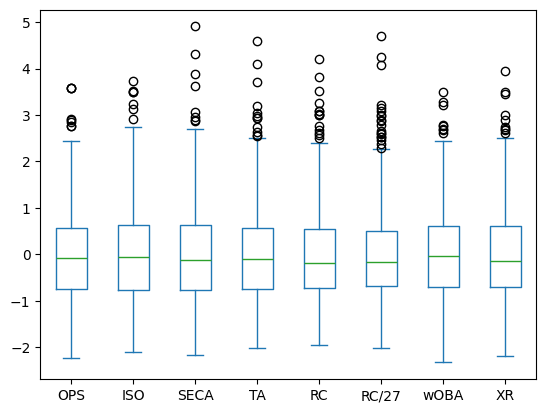

In [7]:
X.plot(kind='box');

# k-means clustering

### 최적의 k 찾기

[2225.7814969700885, 1335.431147224904, 1022.9114281177135, 850.6995897922077, 738.1526654441549]


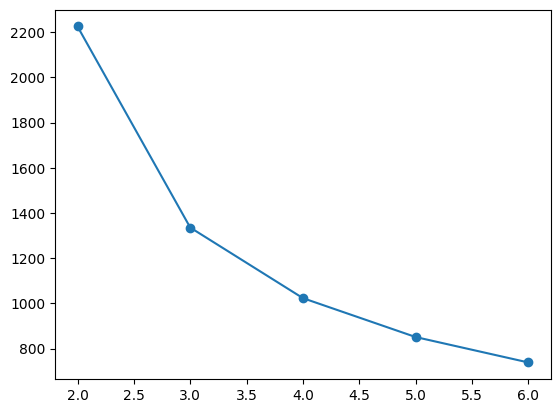

In [8]:
from sklearn.cluster import KMeans 

# 엘보우 기법으로 최적의 k 찾기
inerita = []
for i in range(2,7):
    km = KMeans(i)
    km.fit(X)
    inerita.append(km.inertia_)

print(inerita)

plt.plot(range(2,7), inerita, marker='o')
pass

### 군집화

실루엣 점수: 0.3686437769255018


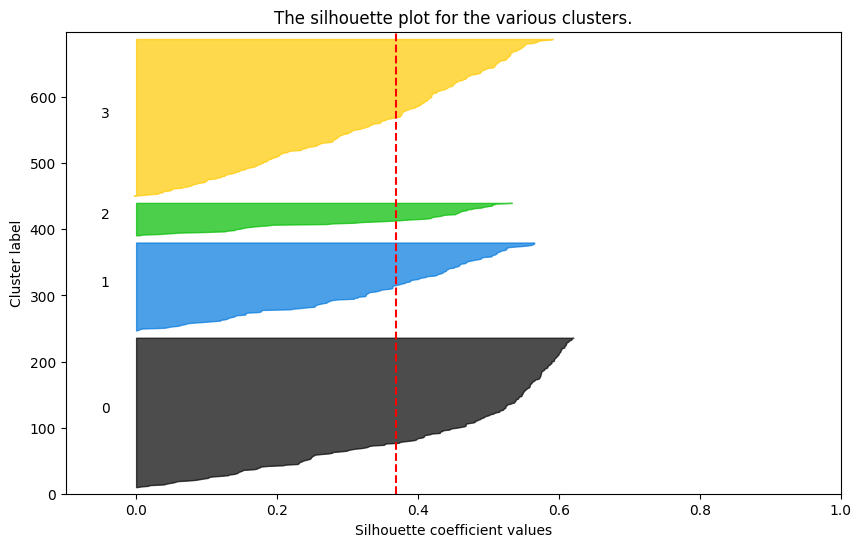

In [11]:
k = 4
ran_s = 10
km = KMeans(n_clusters=k, random_state=ran_s)
# km = KMeans(n_clusters=k)

# 올인원
kmeans_cluster = km.fit_predict(X)
# X['kmeans_cluster'] = kmeans_cluster

# X.head()
# 실루엣 점수 확인
from sklearn.metrics import silhouette_score
print(f'실루엣 점수: {silhouette_score(X, kmeans_cluster)}')

# 실루엣 시각화
from data import silhouette_analysis as s
s.silhouette_plot(X, k)

### 군집화 결과 분석

In [12]:
# 데이터프레임 생성
df = pd.DataFrame(X, columns=X.columns)
df['kmeans_cluster'] = kmeans_cluster
df

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1
...,...,...,...,...,...,...,...,...,...
644,0.412201,1.132233,1.026659,0.530672,-0.349031,0.204838,0.367294,-0.332603,3
645,-0.737598,-0.063556,-0.128516,-0.769272,-0.883686,-1.044144,-0.834318,-0.745176,0
646,-0.422330,-0.051699,0.773504,0.116640,-0.382668,-0.325418,-0.435385,-0.335978,3
647,-1.460858,-1.396013,-1.627267,-1.628601,-1.069759,-1.378851,-1.472888,-1.119570,0


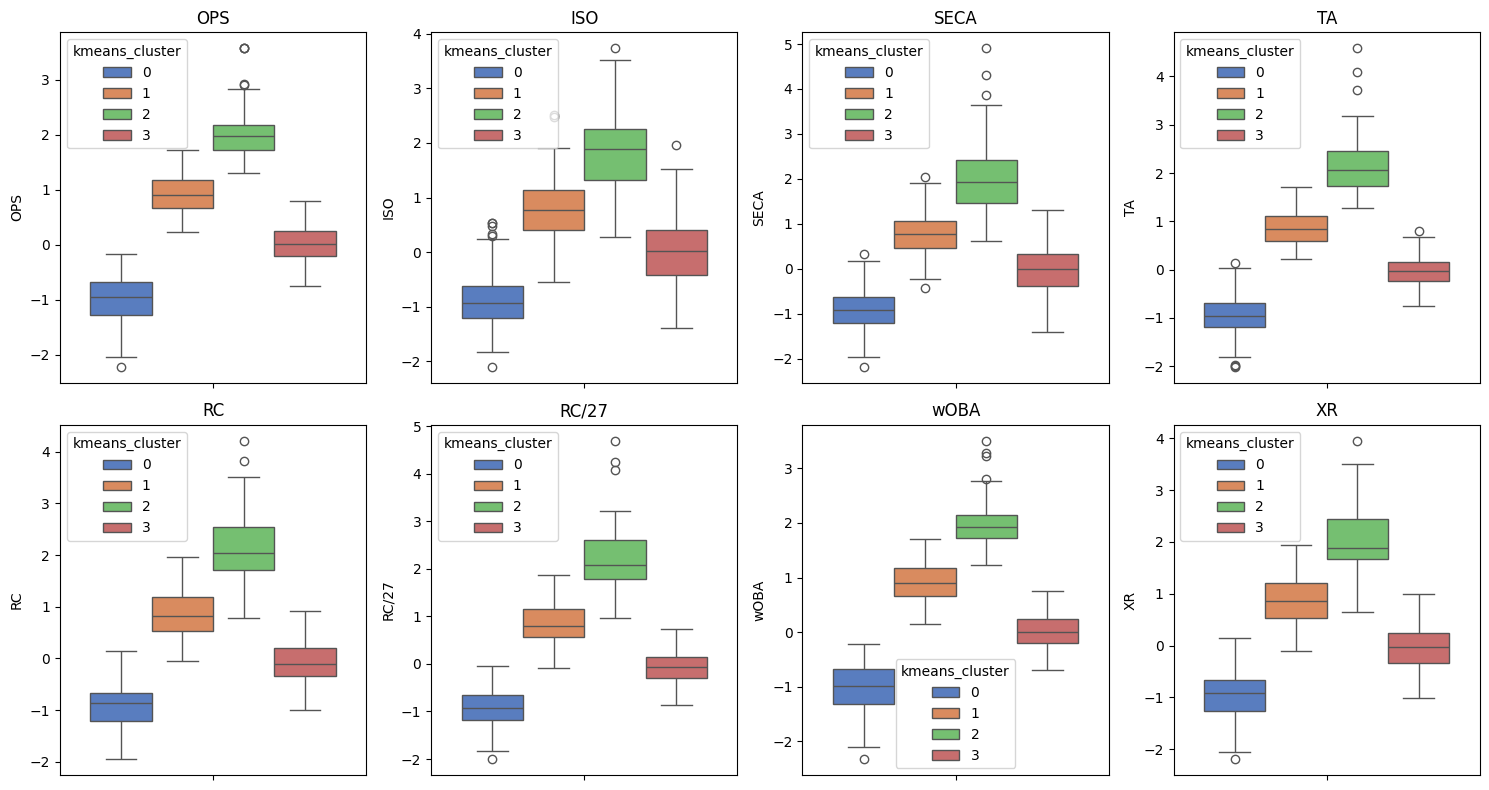

In [13]:
# 군집의 데이터 특징 분석

cols = df.columns[:-1]
view_count = 4

len_cols = len(cols)
len_cols = len_cols//view_count+1 if len_cols%view_count else len_cols//view_count

plt.figure(figsize=(15,len_cols*view_count))

for i, col in enumerate(cols) :
    plt.subplot(len_cols, view_count, i+1)
    sns.boxplot(data=df, y=col, hue='kmeans_cluster', palette='muted')
    plt.title(col)

plt.tight_layout()


In [14]:
# 개별 데이터 실루엣 계수 컬럼 추가
# sns.pairplot(df, hue='kmeans_cluster')

In [15]:
from sklearn.metrics import silhouette_samples
df['silhouette'] = silhouette_samples(X, kmeans_cluster)
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.433784
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.278949
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.365366
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.469111
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.430869


In [16]:
# 잘못 군집화 된 클러스터
df.loc[df['silhouette']<0]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
106,-0.487238,-0.525068,-0.672578,-0.639331,-0.228069,-0.50102,-0.465956,-0.251185,3,-0.003318


In [17]:
# 클러스터 별 중심 player
df['player'] = y

max_idx = df.groupby('kmeans_cluster')['silhouette'].idxmax()
df.loc[max_idx, ['player', 'kmeans_cluster', 'silhouette']]

,player,kmeans_cluster,silhouette
325,2007김민재,0,0.620514
475,2011최정,1,0.565102
553,2013박병호,2,0.533266
192,2004박진만,3,0.591658


In [18]:
df.groupby('kmeans_cluster')['silhouette'].rank()

0       88.0
1       19.0
2       69.0
3       39.0
4       87.0
       ...  
644     27.0
645     54.0
646    151.0
647    176.0
648    195.0
Name: silhouette, Length: 649, dtype: float64

In [19]:
rank_player = df.groupby('kmeans_cluster')['silhouette'].rank()
# df.loc[rank_player, ['player', 'kmeans_cluster']]
df.loc[rank_player, ['player', 'kmeans_cluster', 'silhouette']].head(5)

,player,kmeans_cluster,silhouette
88,2001박종호,0,0.599704
19,2000정경배,3,0.491834
69,2001김종국,0,0.467640
39,2000이호성,0,0.107133
87,2001퀸란,3,0.330026


# 주성분분석

In [20]:
# 모든 특성(컬럼)에 대해 주성분 계산하여 각 데이터포인트를 주성분 공간으로 변환
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(X)
principal_components

array([[ 2.48864775, -1.29871071, -0.18369185, ...,  0.11512947,
        -0.05012084, -0.00542238],
       [ 4.8638416 , -0.32843484,  0.04378699, ...,  0.02815584,
        -0.05298553,  0.00816747],
       [ 2.05850718, -0.4397998 , -0.79470761, ...,  0.02887054,
        -0.04552095, -0.02742987],
       ...,
       [-0.3971905 ,  0.69084294,  0.14211226, ...,  0.09606087,
        -0.0169874 ,  0.04994242],
       [-3.94087277, -0.42488303,  0.27501545, ..., -0.11415355,
         0.00769498,  0.00666951],
       [-3.33227219,  0.22550401, -0.14325161, ..., -0.0513692 ,
         0.01871363, -0.02078552]], shape=(649, 8))

In [21]:
# 컬럼별 설명된 분산 비율 확인
print(pca.explained_variance_ratio_)

[0.90514573 0.05062617 0.02188854 0.0184561  0.00299299 0.00055624
 0.00018392 0.00015031]


In [22]:
# 누적분산 확인
print(pca.explained_variance_ratio_.cumsum())

[0.90514573 0.95577189 0.97766044 0.99611654 0.99910953 0.99966577
 0.99984969 1.        ]


In [23]:
# 2개의 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]], shape=(649, 2))

실루엣 점수: 0.43183378066194306


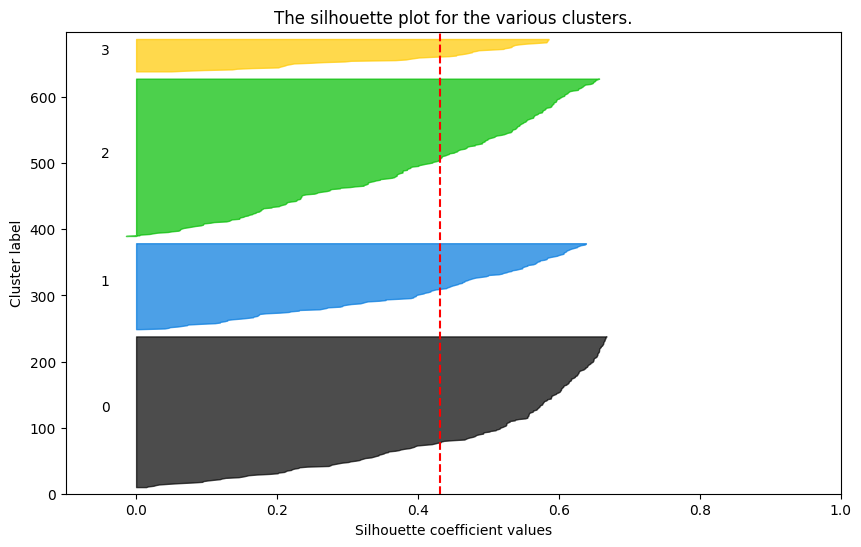

In [24]:
# 주성분으로 군집화
k = 4
ran_s = 10
km = KMeans(n_clusters=k, random_state=ran_s)

# 올인원
kmeans_cluster = km.fit_predict(principal_components)

# 실루엣 점수 확인
from sklearn.metrics import silhouette_score
print(f'실루엣 점수: {silhouette_score(principal_components, kmeans_cluster)}')

# 실루엣 시각화
from data import silhouette_analysis as s
s.silhouette_plot(principal_components, k)

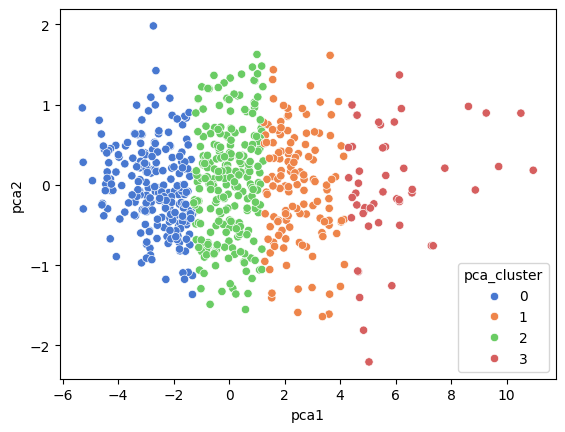

In [25]:
# 군집 결과 시각화
df_pca = pd.DataFrame(principal_components, columns=['pca1','pca2'])

df_pca['pca_cluster'] = kmeans_cluster
sns.scatterplot(data=df_pca, x='pca1', y='pca2',
                hue='pca_cluster', palette='muted')

pass

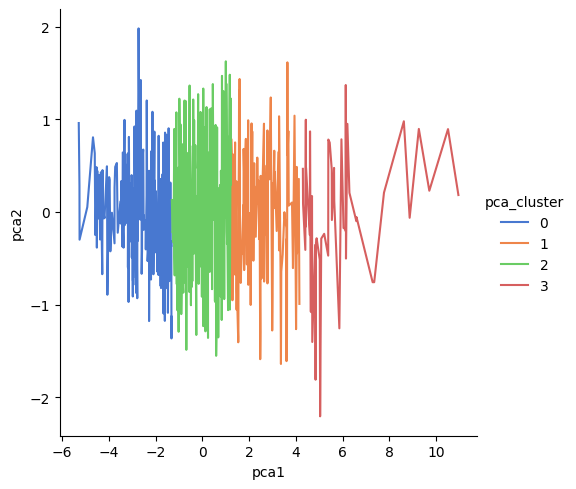

In [26]:
sns.relplot(data=df_pca, x='pca1', y='pca2', hue='pca_cluster', palette='muted', kind='line')